<a href="https://colab.research.google.com/github/analyticsworld1/Pro_Repos/blob/main/Credit_Card_Fraud_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [ ]:
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


#Exploratory Data Analysis

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

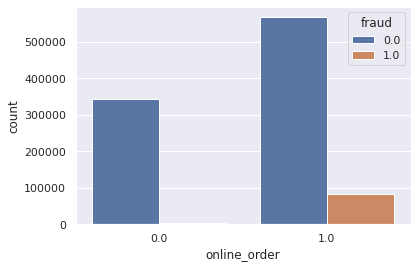

In [ ]:
sns.countplot(data=df, x="online_order", hue="fraud")

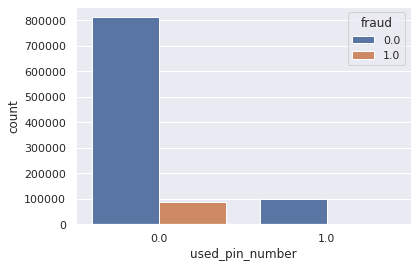

In [ ]:
sns.countplot(data=df, x="used_pin_number", hue="fraud")

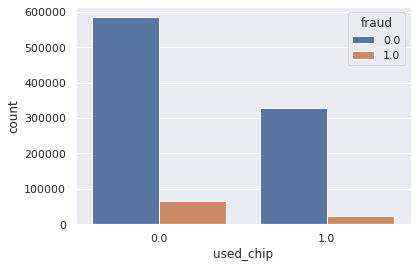

In [ ]:
sns.countplot(data=df, x="used_chip", hue="fraud")

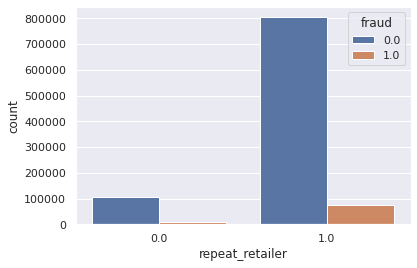

In [ ]:
sns.countplot(data=df, x="repeat_retailer", hue="fraud")

#Check if the class (fraud) is balanced or not

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    912597
1.0     87403
Name: fraud, dtype: int64


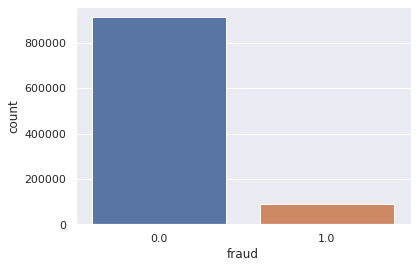

In [ ]:
sns.countplot(df['fraud'])
print(df.fraud.value_counts())

#Oversampling data

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df[(df['fraud']==0)] 
df_minority = df[(df['fraud']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 912597, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


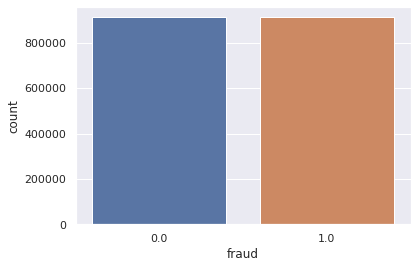

In [ ]:
sns.countplot(df_upsampled['fraud'])

#Check the Outlier using Boxplot

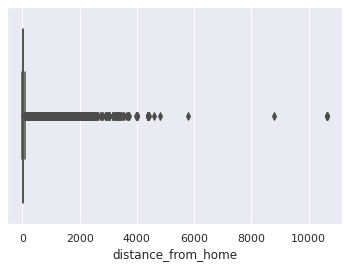

In [ ]:
sns.boxplot(x=df_upsampled["distance_from_home"])

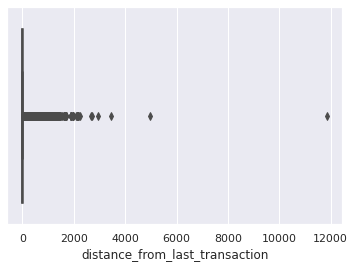

In [ ]:
sns.boxplot(x=df_upsampled["distance_from_last_transaction"])

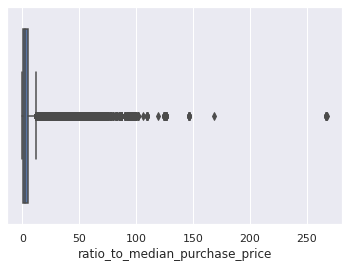

In [ ]:
sns.boxplot(x=df_upsampled["ratio_to_median_purchase_price"])

#Remove the Outlier using Z-Score

In [ ]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis = 1)] 
data_clean.shape

(1646656, 8)

#Check used_pin_number attribute

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    1646656
Name: used_pin_number, dtype: int64


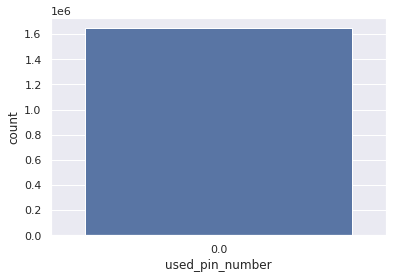

In [ ]:
sns.countplot(data_clean['used_pin_number'])
print(data_clean.used_pin_number.value_counts())

In [ ]:
df2 = data_clean.drop(columns=['used_pin_number'])

#Data Correlation Using Heatmap

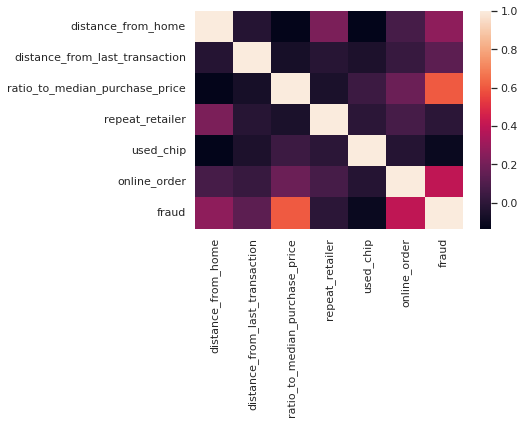

In [ ]:
sns.heatmap(df2.corr(), fmt='.2g')

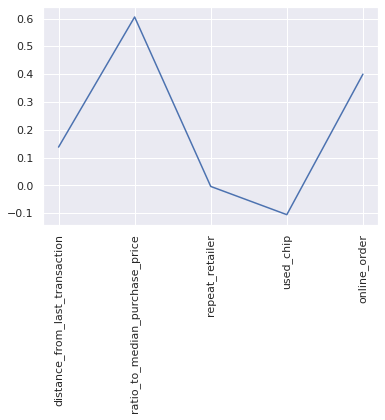

In [ ]:
corr = df2[df2.columns[1:]].corr()['fraud'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

#Machine Learning Train Test Split

In [ ]:
X = df2.drop('fraud', axis=1)
y = df2['fraud']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [ ]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 100.0 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  1.0
Precision Score :  1.0
Recall Score :  1.0


#KNearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 99.14 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score : ',(f1_score(y_test, y_pred)))
print('Precision Score : ',(precision_score(y_test, y_pred)))
print('Recall Score : ',(recall_score(y_test, y_pred)))

F-1 Score :  0.9916791263082624
Precision Score :  0.9835705242427084
Recall Score :  0.9999225351273403
